In [1]:
import sys
sys.path.insert(0, r'../../..')

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
geo_model = gp.create_model('Uncertainty_Hausham_Syncline_Hinterland')

In [3]:
gp.init_data(geo_model, [4483500,4491100.,5287000,5294000.,-1100,1200.],[100,100,100],
            path_o = 'orientations_Uncertainty_Hausham_Hinterland_short_2.csv',
            path_i = 'Points_Uncertainty_Hausham_Hinterland_short.csv', default_values=True);

Active grids: ['regular']


In [4]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,4488606.323,5287829.294,790.620142,0.585663,0.310999,0.529350,RDF_Base_Thrust,Default series,1,1,1.000000e-08
1,4487698.959,5288080.786,976.159782,0.525829,0.327582,0.541585,RDF_Base_Thrust,Default series,1,1,1.000000e-08
2,4489776.703,5288184.813,776.000000,0.662839,0.334442,0.528386,RDF_Base_Thrust,Default series,1,1,1.000000e-08
3,4483648.278,5288215.857,1105.212517,0.258720,0.336489,0.550095,RDF_Base_Thrust,Default series,1,1,1.000000e-08
4,4488163.657,5288445.029,853.969566,0.556472,0.351601,0.533527,RDF_Base_Thrust,Default series,1,1,1.000000e-08


In [5]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
3,4484795.456,5288863.593,914.163032,0.334367,0.379202,0.537496,1.000098e-12,-0.798636,0.601815,53,180,1,RDF_Base_Thrust,Default series,1,1,0.01
8,4486208.500,5287911.000,1160.500000,0.427546,0.316386,0.553740,1.982669e-01,-0.739942,0.642788,50,165,1,RDF_Base_Thrust,Default series,1,1,0.01
10,4486284.151,5289300.000,1047.019383,0.432534,0.407980,0.546257,1.000102e-12,-0.829038,0.559193,56,180,1,RDF_Base_Thrust,Default series,1,1,0.01
13,4489277.500,5289522.500,811.300000,0.629921,0.422652,0.530713,-1.864929e-01,-0.807789,0.559193,56,193,1,RDF_Base_Thrust,Default series,1,1,0.01
18,4491023.000,5290290.000,930.500000,0.745022,0.473262,0.538574,1.116189e-01,-0.633022,0.766044,40,170,1,Helvetics_Base_Thrust,Default series,2,1,0.01


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,RDF_Base_Thrust,Default series,1,False,#015482,1
1,Helvetics_Base_Thrust,Default series,2,False,#9f0052,2
2,Baustein Beds,Default series,3,False,#ffbe00,3
3,Lower Bunte Molasse,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [7]:
gp.map_series_to_surfaces(geo_model,
                            {"Helvetics_Thrust":('Helvetics_Base_Thrust'),
                             "RDF_Thrust":('RDF_Base_Thrust'),
                             "Molasse": ('Lower Bunte Molasse','Lower Chattian Coal FM','Baustein Beds','basement')},remove_unused_series=True);

In [8]:
geo_model.set_is_fault(['Helvetics_Thrust','RDF_Thrust'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Helvetics_Thrust,True,False
RDF_Thrust,True,False
Molasse,False,False


In [9]:
geo_model.faults.faults_relations_df

,Helvetics_Thrust,RDF_Thrust,Molasse
Helvetics_Thrust,False,False,True
RDF_Thrust,False,False,True
Molasse,False,False,False


In [10]:
fr = np.zeros((3,3))
fr[0,2] = True
fr[1,2] = True

fr[0,1] = True


geo_model.faults.set_fault_relation(fr)

,Helvetics_Thrust,RDF_Thrust,Molasse
Helvetics_Thrust,False,True,True
RDF_Thrust,False,False,True
Molasse,False,False,False


In [11]:
geo_model.series

,order_series,BottomRelation
Helvetics_Thrust,1,Fault
RDF_Thrust,2,Fault
Molasse,3,Erosion


In [12]:
new_colors={'Baustein Beds':'#e8e402','Lower Bunte Molasse':'#ff7700','basement':'#000000','Helvetics_Base_Thrust':'#24deff','RDF_Base_Thrust':'#007a10'}
geo_model.surfaces.colors.change_colors(new_colors)

,surface,series,order_surfaces,isBasement,color,id
1,Helvetics_Base_Thrust,Helvetics_Thrust,1,False,#24deff,1
0,RDF_Base_Thrust,RDF_Thrust,1,False,#007a10,2
2,Baustein Beds,Molasse,1,False,#e8e402,3
3,Lower Bunte Molasse,Molasse,2,False,#ff7700,4
4,basement,Molasse,3,True,#000000,5


In [13]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [14]:
geo_model.grid

Grid Object. Values: 
array([[ 4.483538e+06,  5.287035e+06, -1.088500e+03],
       [ 4.483538e+06,  5.287035e+06, -1.065500e+03],
       [ 4.483538e+06,  5.287035e+06, -1.042500e+03],
       ...,
       [ 4.491062e+06,  5.293965e+06,  1.142500e+03],
       [ 4.491062e+06,  5.293965e+06,  1.165500e+03],
       [ 4.491062e+06,  5.293965e+06,  1.188500e+03]])

In [15]:
%matplotlib inline
gp.plot.plot_data_3D(geo_model)

closing vtk


In [16]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_run',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!


In [17]:
gp.get_data(geo_model, 'kriging')

,values
range,10585.4
$C_o$,2.66786e+06
drift equations,"[3, 3, 3]"
nugget grad,0.01
nugget scalar,1e-06


In [18]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,True
number faults,2
number surfaces,4
number series,3
number surfaces per series,"[1, 1, 2]"
len surfaces surface_points,"[3, 13, 7, 6]"
len series surface_points,"[3, 13, 13]"
len series orientations,"[1, 4, 14]"


In [23]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
18,4491023.000,5290290.000,930.500000,0.745022,0.473262,0.538574,1.116189e-01,-0.633022,7.660444e-01,40,170,1,Helvetics_Base_Thrust,Helvetics_Thrust,1,1,0.01
3,4484795.456,5288863.593,914.163032,0.334367,0.379202,0.537496,1.000098e-12,-0.798636,6.018150e-01,53,180,1,RDF_Base_Thrust,RDF_Thrust,2,2,0.01
8,4486208.500,5287911.000,1160.500000,0.427546,0.316386,0.553740,1.982669e-01,-0.739942,6.427876e-01,50,165,1,RDF_Base_Thrust,RDF_Thrust,2,2,0.01
10,4486284.151,5289300.000,1047.019383,0.432534,0.407980,0.546257,1.000102e-12,-0.829038,5.591929e-01,56,180,1,RDF_Base_Thrust,RDF_Thrust,2,2,0.01
13,4489277.500,5289522.500,811.300000,0.629921,0.422652,0.530713,-1.864929e-01,-0.807789,5.591929e-01,56,193,1,RDF_Base_Thrust,RDF_Thrust,2,2,0.01
16,4490813.781,5290501.691,905.000000,0.731226,0.487221,0.536892,-2.105686e-01,0.578533,-7.880108e-01,38,160,-1,Baustein Beds,Molasse,3,3,0.01
17,4490909.815,5293564.701,715.000000,0.737559,0.689201,0.524363,1.000094e-12,-0.766044,6.427876e-01,50,180,1,Baustein Beds,Molasse,3,3,0.01
0,4483517.552,5290758.899,847.983901,0.250100,0.504182,0.533132,3.836131e-02,0.272955,9.612617e-01,16,8,1,Lower Bunte Molasse,Molasse,4,3,0.01
1,4484107.369,5291207.546,850.000000,0.288994,0.533766,0.533265,7.612235e-02,-0.431711,8.987940e-01,26,170,1,Lower Bunte Molasse,Molasse,4,3,0.01
2,4484335.990,5290280.297,810.000000,0.304069,0.472622,0.530628,1.000000e-12,1.000000,1.000061e-12,90,0,1,Lower Bunte Molasse,Molasse,4,3,0.01


In [30]:

geo_model.surface_points.df.index
geo_model.modify_surface_points(geo_model.surface_points.df.index, smooth=1e-6)

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
13,4485407.910,5289411.025,843.914309,0.374754,0.415301,0.532864,Helvetics_Base_Thrust,Helvetics_Thrust,1,1,0.000001
14,4488500.000,5289601.000,771.800000,0.578651,0.427828,0.528109,Helvetics_Base_Thrust,Helvetics_Thrust,1,1,0.000001
18,4491022.989,5290290.308,930.453016,0.745022,0.473282,0.538571,Helvetics_Base_Thrust,Helvetics_Thrust,1,1,0.000001
0,4488606.323,5287829.294,790.620142,0.585663,0.310999,0.529350,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
1,4487698.959,5288080.786,976.159782,0.525829,0.327582,0.541585,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
2,4489776.703,5288184.813,776.000000,0.662839,0.334442,0.528386,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
3,4483648.278,5288215.857,1105.212517,0.258720,0.336489,0.550095,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
4,4488163.657,5288445.029,853.969566,0.556472,0.351601,0.533527,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
5,4487029.562,5288461.786,1105.096790,0.481688,0.352706,0.550087,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001
6,4490545.882,5288610.483,903.303838,0.713560,0.362512,0.536780,RDF_Base_Thrust,RDF_Thrust,2,2,0.000001


In [19]:
import theano

theano.config.floatX

'float64'

In [20]:
geo_model.interpolator.theano_graph.a_T.get_value(), geo_model.interpolator.theano_graph.a_T_surface.get_value()

(array(0.69801778), array(0.69801778))

In [32]:
sol = gp.compute_model(geo_model, compute_mesh=False)

In [33]:
gp.compute_model(geo_model)


Lithology ids 
  [5. 5. 5. ... 5. 5. 5.] 

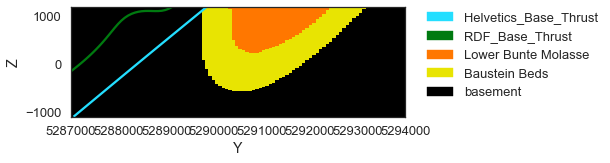

In [27]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=30, show_legend=True,
                    direction='x', show_data=False)

In [39]:
geo_model.series

,order_series,BottomRelation
Helvetics_Thrust,1,Fault
RDF_Thrust,2,Fault
Molasse,3,Erosion


/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'show_legend'
  s)
/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'show_legend'
  s)


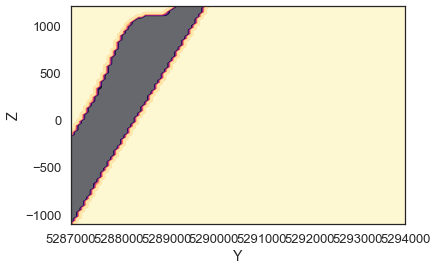

In [40]:
gp.plot.plot_scalar_field(geo_model, series=2, cell_number=30, show_legend=True,
                    direction='x', show_data=False)

In [41]:
gp.plot.plot_3D(geo_model, show_data=True)

closing vtk


In [ ]:
gp.save_model(geo_model, path='C:/Users/Kevin/Documents/Studium/Master_Thesis/GemPy_Models')

# special location:

In [ ]:
x_i = np.array([[60,40,100]])
sol = gp.compute_model_at(x_i, geo_model)

In [ ]:
sol[0][0, :x_i.shape[0]]

In [ ]:
gp.plot.plot_3D(geo_model)